## Sports Analytics Final Report

### Evan Scheibler

#### We will attempt to identify important customers, based on the value of the surrounding area they live, and the percentage of married heads of household in their area. These two variables, in combination with the number of years and whether or not the buyer is a 'backer' will help us find who is likely to renew or defect.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm

C:\Users\esche\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#read in file and show head
df=pd.read_excel("train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [3]:
#show file types and number of entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


In [4]:
#show the number of null values in the columns
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
CHILD       4667
GNDR           0
OWNHOME        0
SPORT       4943
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

## Model Development

In [5]:
#creating the model for training
y = df['Y2defect']
X = df[['BACKER', 'YEARS', 'PCTMARR', 'HOMEVAL']]

In [6]:
#run testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.52875226039783
[[745 618]
 [685 717]]
             precision    recall  f1-score   support

          0       0.52      0.55      0.53      1363
          1       0.54      0.51      0.52      1402

avg / total       0.53      0.53      0.53      2765

0.5290003380560001


## Model Deployment

In [9]:
#read in the validation dataset for making the final model
df2 = pd.read_excel("validation_dataset.xlsx")
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [10]:
#create new frame with just the columns we want for validation
validation = df2[['BACKER', 'YEARS','PCTMARR','HOMEVAL']]
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 4 columns):
BACKER     9542 non-null int64
YEARS      9542 non-null int64
PCTMARR    9542 non-null int64
HOMEVAL    9542 non-null int64
dtypes: int64(4)
memory usage: 298.3 KB


In [11]:
#create new frame with just the ID column
fakeid = pd.DataFrame(df2['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


In [13]:
# applying the decision tree model to validation dataset
output_scoring = dt.predict(validation)

# generating probability for defect for each fan
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

# generating submission file
risky_fans.to_csv("finalsubmissionentry2.csv", index=False)

## Data Visualization

In [31]:
validation.corr()

,BACKER,YEARS,PCTMARR,HOMEVAL
BACKER,1.000000,0.492478,0.010910,-0.047955
YEARS,0.492478,1.000000,0.020784,-0.051347
PCTMARR,0.010910,0.020784,1.000000,0.066991
HOMEVAL,-0.047955,-0.051347,0.066991,1.000000


In [32]:
df2.corr()

,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,SPORT,PCTMARR,HOMEVAL
Y3defect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y2G5,NaN,1.000000,0.007713,0.057423,0.021634,0.096453,0.089316,0.105501,0.180600,0.015842,-0.049736,0.007308,0.015538
Y2G4,NaN,0.007713,1.000000,-0.052441,-0.148794,0.050348,-0.019234,0.100296,0.053399,-0.019987,-0.000335,0.004612,-0.013398
Y2G3,NaN,0.057423,-0.052441,1.000000,0.001669,-0.005759,0.019278,0.069078,0.063429,0.007587,-0.004990,-0.003324,-0.015174
Y2G2,NaN,0.021634,-0.148794,0.001669,1.000000,-0.101482,-0.029676,-0.044439,0.047534,-0.012510,-0.003562,0.000061,0.016080
Y2G1,NaN,0.096453,0.050348,-0.005759,-0.101482,1.000000,-0.022213,0.185428,0.104893,0.046223,-0.015138,0.011760,-0.024720
Y2price,NaN,0.089316,-0.019234,0.019278,-0.029676,-0.022213,1.000000,0.015137,-0.116282,-0.033068,0.034644,-0.015772,0.086208
YEARS,NaN,0.105501,0.100296,0.069078,-0.044439,0.185428,0.015137,1.000000,0.492478,0.264872,-0.058312,0.020784,-0.051347
BACKER,NaN,0.180600,0.053399,0.063429,0.047534,0.104893,-0.116282,0.492478,1.000000,0.196914,-0.056746,0.010910,-0.047955
AGE,NaN,0.015842,-0.019987,0.007587,-0.012510,0.046223,-0.033068,0.264872,0.196914,1.000000,-0.056324,-0.062175,0.012638


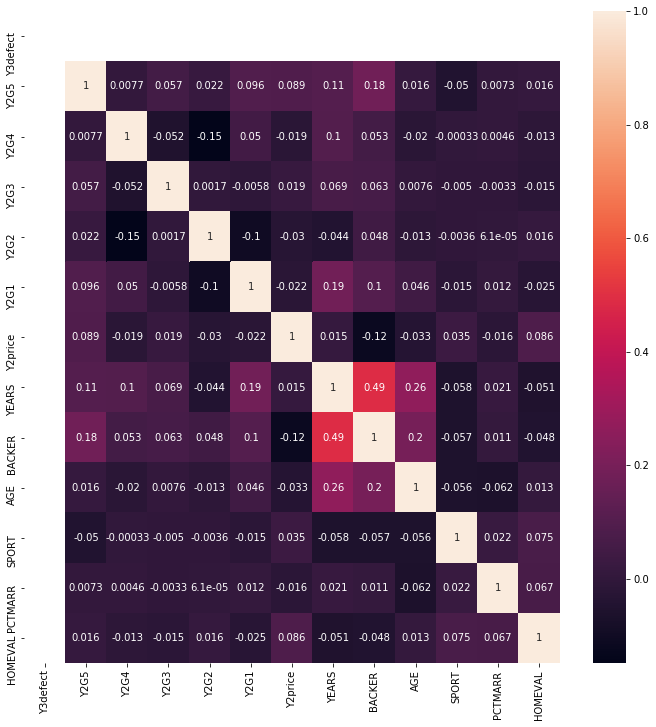

In [33]:
# correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df2.corr(), annot=True)

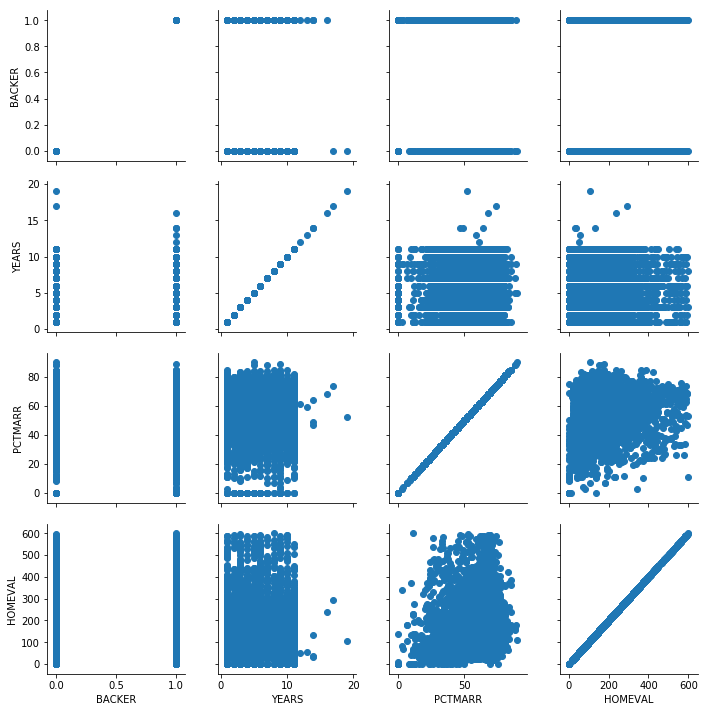

In [34]:
#create a scatter matrix
g = sns.PairGrid(validation)
g.map(plt.scatter)

## Further Analysis

In [14]:
final = pd.read_csv('finalsubmissionentry.csv')
final.head()

,FAKEID,prob of Renewal,prob of Defect,Predicted Defect
0,580D24RR,0.0,1.0,1
1,179Q96NO,0.0,1.0,1
2,050Z45TB,1.0,0.0,0
3,399V18KY,0.0,1.0,1
4,009A52KP,1.0,0.0,0


In [15]:
risk = validation.join(final)
risk.head()

,BACKER,YEARS,PCTMARR,HOMEVAL,FAKEID,prob of Renewal,prob of Defect,Predicted Defect
0,0,5,66,64,580D24RR,0.0,1.0,1
1,1,9,67,128,179Q96NO,0.0,1.0,1
2,1,5,52,113,050Z45TB,1.0,0.0,0
3,0,1,65,81,399V18KY,0.0,1.0,1
4,1,9,65,110,009A52KP,1.0,0.0,0


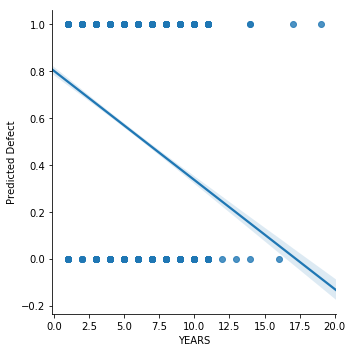

In [16]:
#graph the relationship between years and the predicted defect
sns.lmplot("YEARS", "Predicted Defect", risk)

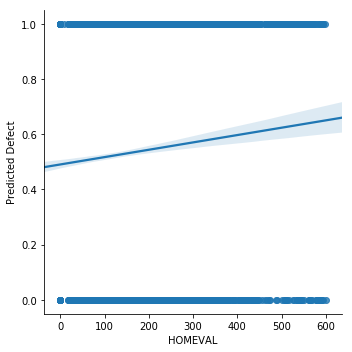

In [17]:
#graph the relationship between home eval and the predicted defect
sns.lmplot("HOMEVAL", "Predicted Defect", risk)

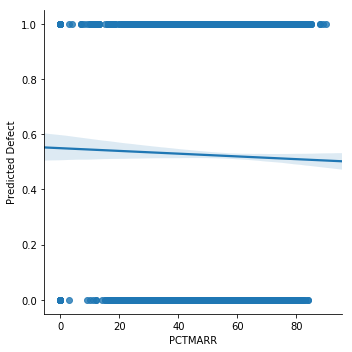

In [18]:
#graph the relationship between years and the predicted defect
sns.lmplot("PCTMARR", "Predicted Defect", risk)

In [19]:
A = risk['Predicted Defect']
B = risk.drop(['Predicted Defect'], axis=1)

In [22]:
B = risk.drop(['prob of Renewal','prob of Defect','Predicted Defect', 'FAKEID'], axis=1)
B.head()

,BACKER,YEARS,PCTMARR,HOMEVAL
0,0,5,66,64
1,1,9,67,128
2,1,5,52,113
3,0,1,65,81
4,1,9,65,110


In [23]:
model1 = lm.LinearRegression()
model1.fit(B, A)   
model1_y = model1.predict(B)
print 'Coefficients: ', model1.coef_
print "y-intercept ", model1.intercept_

Coefficients:  [-0.08292712 -0.03955918 -0.00035134  0.00018009]
y-intercept  0.7983753699827181


In [24]:
pd.DataFrame(zip(B.columns, np.transpose(model1.coef_)))

,0,1
0,BACKER,-0.082927
1,YEARS,-0.039559
2,PCTMARR,-0.000351
3,HOMEVAL,0.000180


In [25]:
coef = ["%.3f" % i for i in model1.coef_]
Bcolumns = [ i for i in B.columns ]
zip(Bcolumns, coef)

[(u'BACKER', '-0.083'),
 (u'YEARS', '-0.040'),
 (u'PCTMARR', '-0.000'),
 (u'HOMEVAL', '0.000')]

In [27]:
print "mean square error: ", mean_squared_error(A, model1_y)
print "variance or r-squared: ", explained_variance_score(A, model1_y)

 mean square error:  0.22699313228552792
variance or r-squared:  0.09047677218949457
